In [ ]:
%matplotlib inline

# Import Dependencies

In [ ]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12.0, 9.0)

# Prepare Data

We generate 100 data points, whose $x$-coordinates are selected from a uniform distribution [20, 70], and whose $y$-coordinates are computed following a linear distribution $mx+c$. Note that we let $m$ and $c$ be any float within the ranges [1, 2] and [-4, 4], respectively.

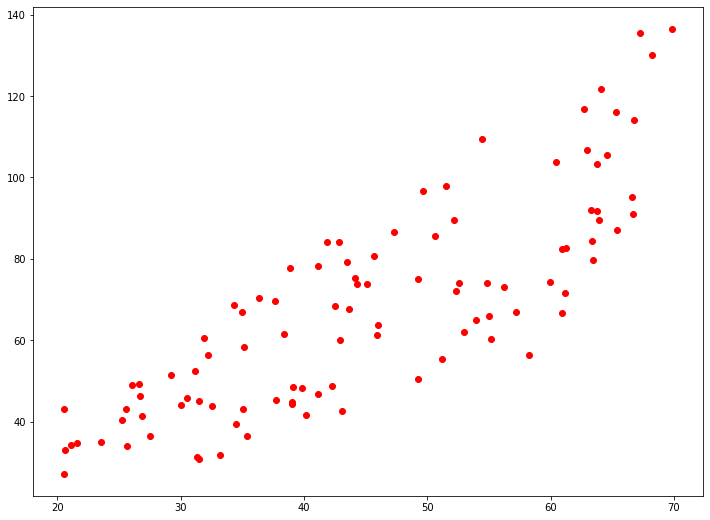

In [ ]:
X = pd.Series(np.random.uniform(20, 70, 100))
m = np.random.uniform(1, 2, 100)
c = np.random.uniform(-4, 4, 100)
y = m * X + c

plt.scatter(X, y, c='r')
plt.show()

In [ ]:
m_avg, c_avg = m.mean(), c.mean()

# Define Loss Function

Here, we'll use Mean Squared Error (MSE) as our loss.

$$\begin{equation*}
  \frac{1}{n}\sum_{i=1}^n (y_i - \hat{y}_i)^2
\end{equation*}$$

In [ ]:
def MSE(labels: pd.Series, 
        predictions: pd.Series) -> float:
  return ((labels - predictions)**2).mean()

# Gradient Descent



1.   Initialize $m$ and $c$ as zero.
2.   Calculate the partial derivatives of the loss w.r.t. $m$ and $c$.

$$\begin{equation*}
  D_m=\frac{-2}{n}\sum_{i=0}^n x_i(y_i-\hat{y}_i)
\end{equation*}$$

$$\begin{equation*}
  D_c=\frac{-2}{n}\sum_{i=0}^n (y_i-\hat{y}_i)
\end{equation*}$$

3.   Update the values of $m$ and $c$.

$$\begin{equation*}
  m = m - L \times D_m
\end{equation*}$$

$$\begin{equation*}
  c = c - L \times D_c
\end{equation*}$$

4.   Repeat this process until the loss function converges to a local minimum, which we shall define to be when the change in loss between epochs is less than 0.01%.



In [ ]:
def train(X: pd.Series,
          labels: pd.Series,
          learning_rate: float):
  # Initialize variables
  n, m, c, tmp, epoch = float(len(X)), 0, 0, 0, 1
  # Start training loop
  while True:
    # Make predictions
    predictions = m * X + c
    # Calculate loss
    loss = MSE(labels, predictions)
    # Print training info
    print(f'Error at epoch {epoch}: {loss}')
    # Partial derivative w.r.t. m
    D_m = (-2 / n) * (X * (labels - predictions)).sum()
    # Partial derivative w.r.t. c
    D_c = (-2 / n) * (labels - predictions).sum()
    # Update variables
    m -= learning_rate * D_m  
    c -= learning_rate * D_c 
    epoch += 1
    # Compute loss improvement, and break if converged
    if tmp != 0:
      ratio = loss/tmp
      if ratio > 0.9999:
        return m, c
    tmp = loss

# Hyperparameters

In [ ]:
lr = 1e-4

# Train & Evaluate Performance

In [ ]:
m, c = train(X, y, lr)
print(f'\nLinear regression: y = ({m})x + ({c})')
print(f'Expected regression: y = ({m_avg})x + ({c_avg})')

Error at epoch 1: 5263.231760752821
Error at epoch 2: 1752.2670206098378
Error at epoch 3: 678.5623691234567
Error at epoch 4: 350.2076958698719
Error at epoch 5: 249.79200731359873
Error at epoch 6: 219.08341242094698
Error at epoch 7: 209.69227190532837
Error at epoch 8: 206.82032243948694
Error at epoch 9: 205.94203746998355
Error at epoch 10: 205.67344442294495
Error at epoch 11: 205.59130413213953
Error at epoch 12: 205.5661838362442
Error at epoch 13: 205.55850109336725

Linear regression: y = (1.5033315402605256)x + (0.030267346723400323)
Expected regression: y = (1.5227425814505942)x + (-0.5328181811121528)


Once we've arrived at an optimal linear regression, we can fit it to the data, and compare it with the expected regression (obtained by taking the mean of the initial 100 $m$ and $c$ values).

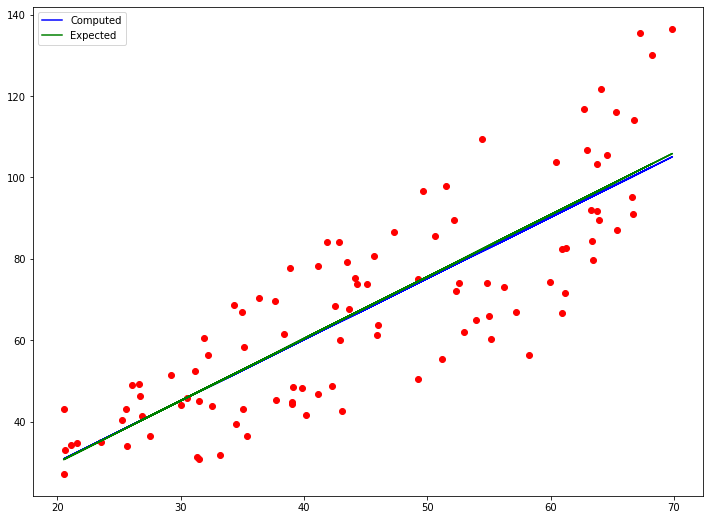

In [ ]:
my_pred = m * X + c
exp_pred = m_avg * X + c_avg

plt.scatter(X, y, c='r')
plt.plot(X, my_pred, c='b')
plt.plot(X, exp_pred, c='g')
plt.legend(['Computed', 'Expected'])
plt.show()

# Conclusion

As we can clearly see, both the blue and green lines are fairly similar, meaning our algorithm is working as expected.